<a href="https://colab.research.google.com/github/Kaguya2906/Anomaly_Detection_Weekly_Project/blob/main/02.CreditCard%20EDA%2CFeature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this notebook, I'll

(1) conduct an exhaustive **Exploratory Data Analysis** on the provided Okolahoma credit card transaction dataset. The purchases made through the purchase card programs were administered by the state and higher education institutions;

(2) create **15 new features** and explain why I believe for each feature, is good to identify anomalies. This dataset has no target variable, so this will be an unsupervised ML model.

# Objectives:

Create features around the **R-F-M principle**

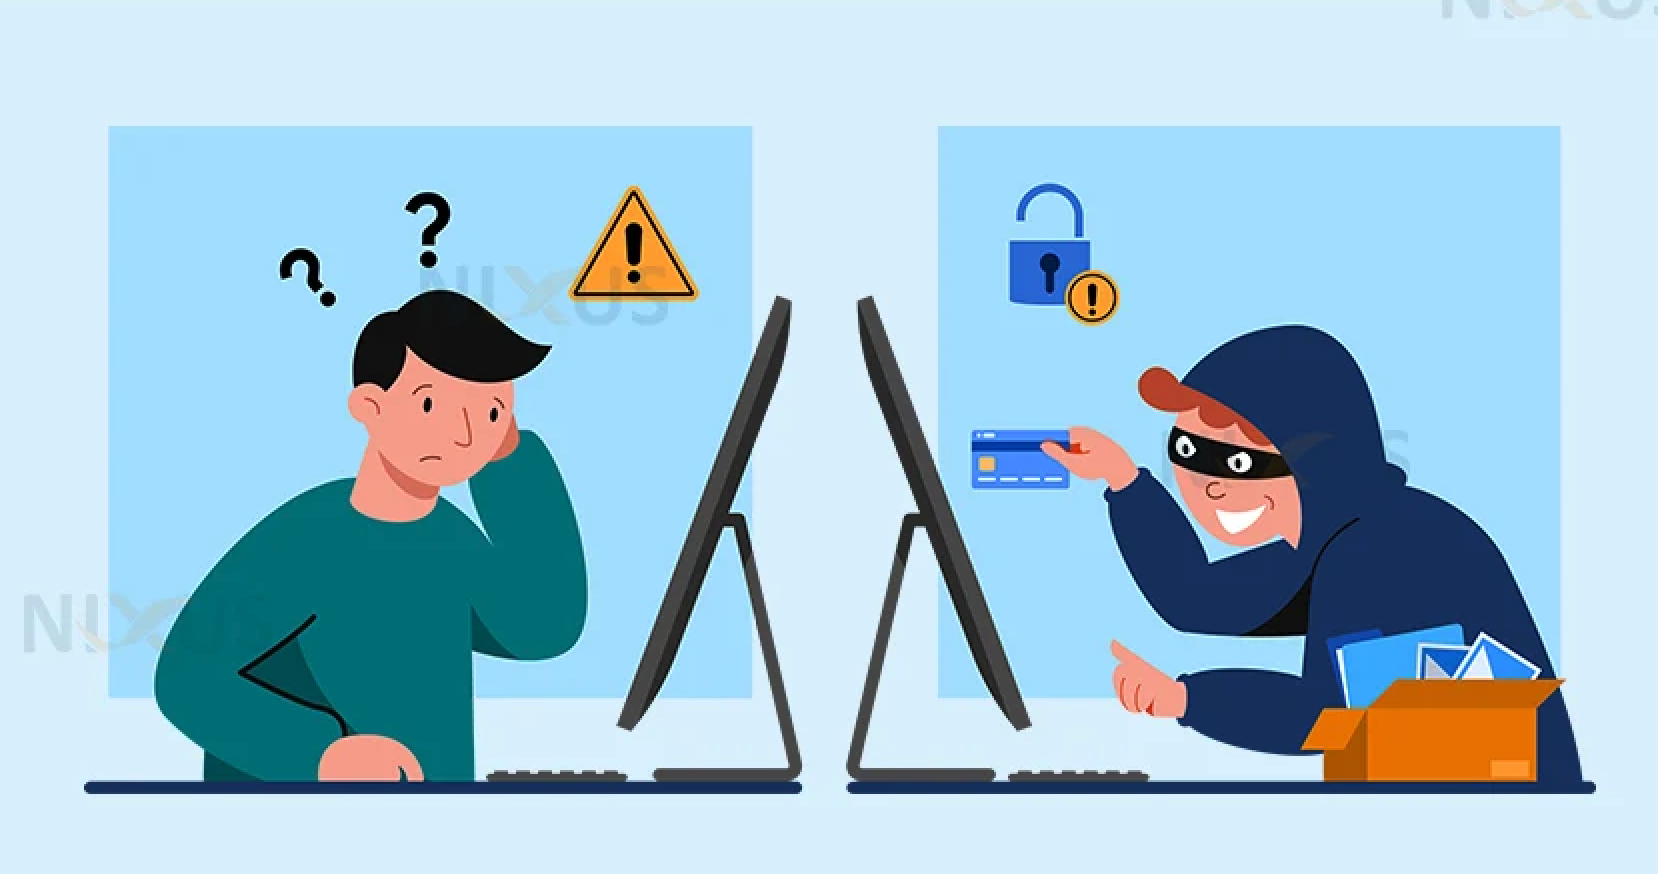

# Libraries, Dataset

In [ ]:
#!pip install plotly
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("purchase_credit_card.csv")
df.head(2)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON


In [ ]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns
print(df.shape)
print(df.columns) # check column names

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


In [ ]:
# change column names
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

## Data Cleaning

***Restructring Rationale***

**1.** `Transaction_Date`, `Posted_Date`, `Year_Month`: Manipulate datetime object for them using `.to_datetime()` to enable advanced datetime operations and analysis;

**2.** `Year_Month`: The dataset covers a complete school year from June 2013 to July 2014. To extract the 'month' and 'year' components from the 'Year_Month' column, using the `%Y%m` format and create separate columns for `Year` and `Month`. This allows for more granular analysis and feature engineering based on these temporal aspects;

**3.** `Week_Number`, `DayofWeek`: Derive week-related info from 'Transaction_Date' to incorporate into these two new columns for feature engineering.

**4.** `Amount` is previously a string object. Convert it into float format for performing mathematical calculations and feature engineering.

In [ ]:
# Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Posted_Date'] = pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

# Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

# Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

# Reformat Amount column
#df['Amount'] = df['Amount'].str.replace(',', '').astype(float)

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

## New Dataframe

In [ ]:
# Check the new df columns
df.columns

Index(['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
       'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor',
       'Transaction_Date', 'Posted_Date', 'Merchant_Category', 'Year', 'Month',
       'Week_Number', 'Day_of_Week'],
      dtype='object')

In [ ]:
# Check the datatype of each features
df.dtypes

Year_Month                  datetime64[ns]
Agency_Number                        int64
Agency_Name                         object
Cardholder_Last_Name                object
Cardholder_First_Initial            object
Description                         object
Amount                             float64
Vendor                              object
Transaction_Date            datetime64[ns]
Posted_Date                 datetime64[ns]
Merchant_Category                   object
Year                                 int64
Month                                int64
Week_Number                         UInt32
Day_of_Week                         object
dtype: object

In [ ]:
df.head(10)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday
6,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday
7,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,2013-07-29,2013-07-31,FAST FOOD RESTAURANTS,2013,7,31,Monday
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,2013-07-30,2013-07-31,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",2013,7,31,Tuesday
9,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,2013-07-30,2013-07-31,TELECOMMUNICATION SERVICES,2013,7,31,Tuesday


In [ ]:
df.tail(10)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
442448,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2622.70,HAROLDS AUTO PARTS OF,2014-06-20,2014-06-23,AUTOMOTIVE PARTS AND ACCESSORIES STORES,2014,6,25,Friday
442449,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,132790.14,EVANS ENTERPRISES,2014-06-20,2014-06-23,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2014,6,25,Friday
442450,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,1307.58,YELLOWHOUSE MACHINERY CO-,2014-06-19,2014-06-23,"MISC. AUTOMOTIVE,AIRCRAFT,AND FARM EQUIPMENT D...",2014,6,25,Thursday
442451,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,Payment on Account Each,3302.60,O REILLY AUTO 00050559,2014-06-19,2014-06-23,AUTOMOTIVE PARTS AND ACCESSORIES STORES,2014,6,25,Thursday
442452,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,FUEL PUMP EA|FUEL PUMP GASKET EA|CLAMP 5 EA|CO...,189.13,WHITE STAR MACHINERY,2014-06-20,2014-06-23,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2014,6,25,Friday
442453,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,2014-06-20,2014-06-23,HARDWARE EQUIPMENT AND SUPPLIES,2014,6,25,Friday
442454,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,2014-06-20,2014-06-23,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY",2014,6,25,Friday
442455,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,2014-06-20,2014-06-23,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2014,6,25,Friday
442456,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,2014-06-19,2014-06-23,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,2014,6,25,Thursday
442457,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,4714.07,WARRENCAT CREDIT DEPT,2014-06-20,2014-06-23,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Friday


# EDA

## Count statistics by `Agency_name` in agency_count

In [ ]:
len(df["Agency_Name"].unique())

124

<Axes: xlabel='Count', ylabel='Agency_Name'>

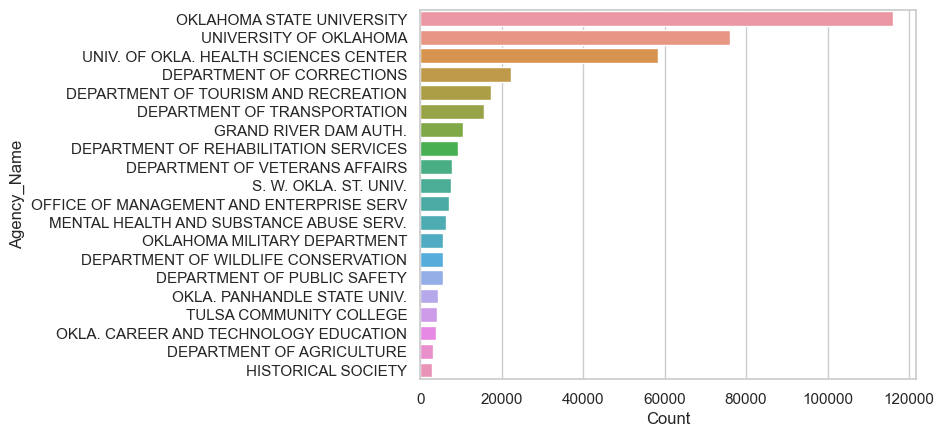

In [ ]:
agency_count = df['Agency_Name'].value_counts()
agency_count = pd.DataFrame(agency_count).reset_index()
agency_count.columns = ['Agency_Name','Count']

fig = px.bar(agency_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=600, height=300)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Agency_Name", x="Count", data=agency_count[0:20])

***Summary:***

In [ ]:
OSU = agency_count.loc[agency_count["Agency_Name"] == "OKLAHOMA STATE UNIVERSITY", "Count"].values[0]
UOO = agency_count.loc[agency_count["Agency_Name"] == "UNIVERSITY OF OKLAHOMA", "Count"].values[0]
HSC = agency_count.loc[agency_count["Agency_Name"] == "UNIV. OF OKLA. HEALTH SCIENCES CENTER", "Count"].values[0]

print(f"OKLAHOMA State University, University of Oklahoma and its Health Science Center emerge as the top 3 most frequent transaction agencies, with {OSU}, {UOO}, and {HSC} times separately.")

OKLAHOMA State University, University of Oklahoma and its Health Science Center emerge as the top 3 most frequent transaction agencies, with 115995, 76143, and 58247 times separately.


## Count statistics by `Merchant_Category` in merchant_count

In [ ]:
len(df["Merchant_Category"].unique())

435

<Axes: xlabel='Count', ylabel='Merchant_Category'>

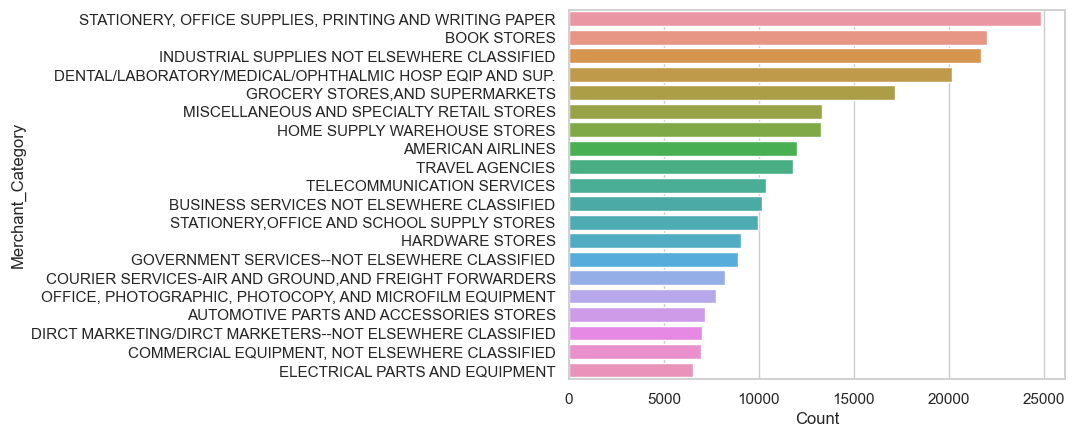

In [ ]:
merchant_count = df['Merchant_Category'].value_counts()
merchant_count = pd.DataFrame(merchant_count).reset_index()
merchant_count.columns = ['Merchant_Category','Count']

fig = px.bar(merchant_count, x='Merchant_Category', y='Count', width=600, height=300)

sns.set_theme(style="whitegrid")
sns.barplot(y="Merchant_Category", x="Count", data=merchant_count[:20])

***Summary:***

Five categories stand out as the most commonly visited places: Office Suppliers, Bookstore, Industry Suppliers, Medical place, and Grocery store. These five merchants happen to be more than 15k visites by students in the school year.

## Count statistics by `Description` in description_count

In [ ]:
len(df["Description"].unique())

88749

<Axes: xlabel='Count', ylabel='Purchase_Description'>

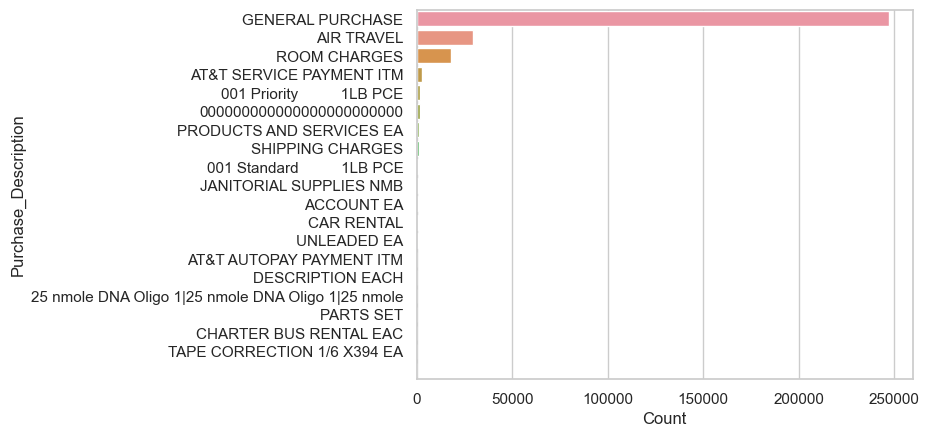

In [ ]:
descript_count = df['Description'].value_counts()
descript_count = pd.DataFrame(descript_count).reset_index()
descript_count.columns = ['Purchase_Description', 'Count']

fig = px.bar(descript_count, x='Purchase_Description', y='Count', width=1000, height=300)

sns.set_theme(style="whitegrid")
sns.barplot(y="Purchase_Description", x="Count", data=descript_count[:20])

***Summary:***

In [ ]:
general = descript_count.loc[descript_count["Purchase_Description"] == "GENERAL PURCHASE", "Count"].values[0]
print(f"{general} purchases made are categorized as 'GENERAL PURCHASE'. That's more than half of the total transactions.")

247187 purchases made are categorized as 'GENERAL PURCHASE'. That's more than half of the total transactions.


## Count statistics by `Vendor` in vendor_count

In [ ]:
len(df["Vendor"].unique())

86729

<Axes: xlabel='Count', ylabel='Vendor'>

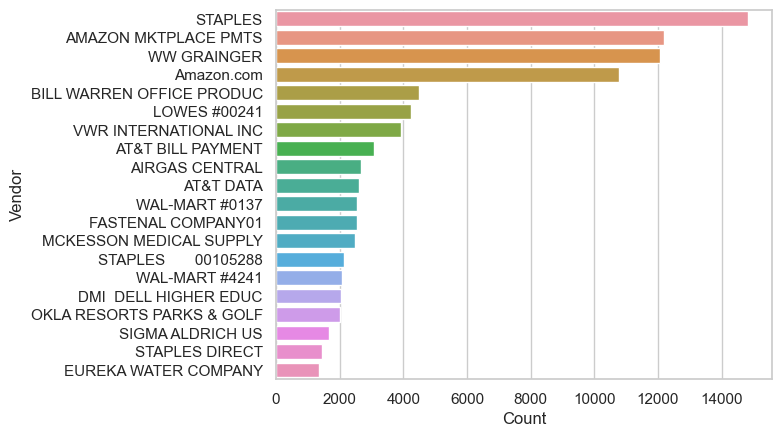

In [ ]:
vendor_count = df['Vendor'].value_counts()
vendor_count = pd.DataFrame(vendor_count).reset_index()
vendor_count.columns = ['Vendor','Count']

fig = px.bar(vendor_count, x='Vendor', y='Count', width=600, height=300)

sns.set_theme(style="whitegrid")
sns.barplot(y="Vendor", x="Count", data=vendor_count[:20])

***Summary:***

In [ ]:
STP = vendor_count.loc[vendor_count["Vendor"] == "STAPLES", "Count"].values[0]
AMP = vendor_count.loc[vendor_count["Vendor"] == "AMAZON MKTPLACE PMTS", "Count"].values[0]
GRA = vendor_count.loc[vendor_count["Vendor"] == "WW GRAINGER", "Count"].values[0]
AMZ = vendor_count.loc[vendor_count["Vendor"] == "Amazon.com", "Count"].values[0]

print(f"From the records, students visited STAPLES for {STP} times, Amazon MKTplace for {AMP} times, WW GRAINGER for {GRA} times, and Amazon.com for {AMZ} times. The rest of the vendors have less than 10k times of visits.")

From the records, students visited STAPLES for 14842 times, Amazon MKTplace for 12197 times, WW GRAINGER for 12076 times, and Amazon.com for 10766 times. The rest of the vendors have less than 10k times of visits.


## Distribution of Purchasing Amount

In [ ]:
df["Amount"].describe().apply(lambda x: "{:,.2f}".format(x))

count      442,458.00
mean           424.99
std          5,266.51
min        -42,863.04
25%             30.91
50%            104.89
75%            345.00
max      1,903,858.37
Name: Amount, dtype: object

***Summary:***

In [ ]:
# Convert the `amount` Series to numerical values
amount = pd.to_numeric(df['Amount'], errors='coerce')

# Count the number of negative values
negative_amount = (amount < 0).sum()
print(f"There are {negative_amount} transactions amount recording as negative-value.")

There are 14531 transactions amount recording as negative-value.


## Missing values for cardholder Info

In [ ]:
missing_name = df[df['Cardholder_Last_Name']=='Cardholder']
missing_name.tail(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
442453,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,2014-06-20,2014-06-23,HARDWARE EQUIPMENT AND SUPPLIES,2014,6,25,Friday
442454,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,2014-06-20,2014-06-23,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY",2014,6,25,Friday
442455,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,2014-06-20,2014-06-23,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2014,6,25,Friday
442456,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,2014-06-19,2014-06-23,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,2014,6,25,Thursday
442457,2014-06-01,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,4714.07,WARRENCAT CREDIT DEPT,2014-06-20,2014-06-23,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Friday


***Summary:***

In [ ]:
missing_count = missing_name['Cardholder_Last_Name'].count()
print(f"There are {missing_count} records of cardholder's name missing.\nIn this case, the last name is replaced by 'Cardholder' and the first name is replaced by 'e'.")

There are 1629 records of cardholder's name missing.
In this case, the last name is replaced by 'Cardholder' and the first name is replaced by 'e'.


## Visualize the purchasing pattern by Months

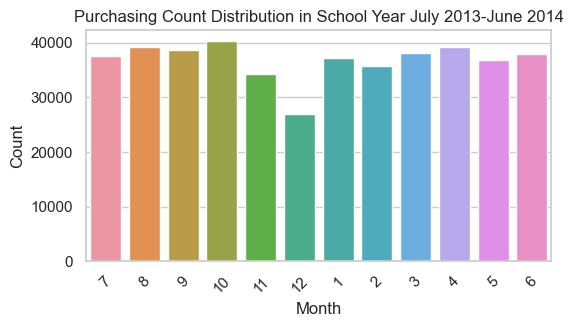

In [ ]:
month_count = df['Month'].value_counts().sort_index()
month_count = pd.DataFrame(month_count).reset_index()
month_count.columns = ['Month', 'Count']

plt.figure(figsize=(6, 3))
sns.barplot(x='Month', y='Count', data=month_count, order=[7,8,9,10,11,12,1,2,3,4,5,6])
plt.title('Purchasing Count Distribution in School Year July 2013-June 2014')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Summary:***

December is seen as the month with the least transaction records. This observation is consistent with the holiday season, where many students are likely to return home rather than remain on campus.

## Visualize the purchasing pattern by week number


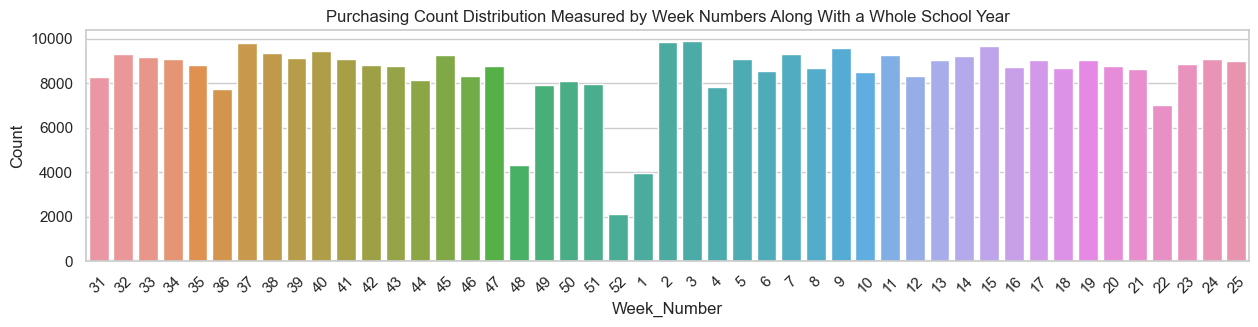

In [ ]:
wknumber = df['Week_Number'].value_counts().sort_index()
wknumber = pd.DataFrame(wknumber).reset_index()
wknumber.columns = ['Week_Number', 'Count']

order = list(range(31, 53)) + list(range(1, 26))

plt.figure(figsize=(15, 3))
sns.barplot(x='Week_Number', y='Count', data=wknumber, order=order)
plt.title('Purchasing Count Distribution Measured by Week Numbers Along With a Whole School Year')
plt.xlabel('Week_Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Summary:***

The distribution of transaction records by week is consistent with the monthly distribution observed previously. This analysis provides a more detailed view of the transaction patterns on a weekly basis.

## Visualize the purchasing pattern by DayOfWeek

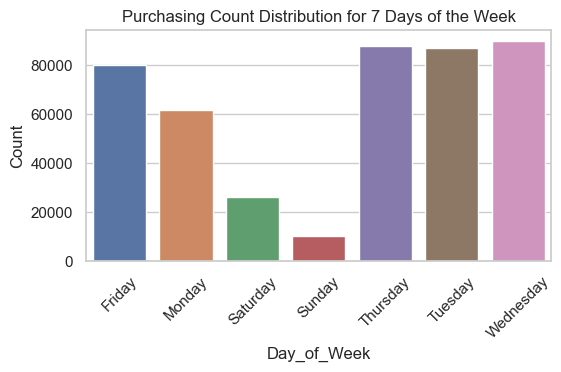

In [ ]:
wk_count = df['Day_of_Week'].value_counts().sort_index()
wk_count = pd.DataFrame(wk_count).reset_index()
wk_count.columns = ['Day_of_Week', 'Count']

plt.figure(figsize=(6, 3))
sns.barplot(x='Day_of_Week', y='Count', data=wk_count)
plt.title('Purchasing Count Distribution for 7 Days of the Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Summary:***

Weekends, particularly Sundays, have the lowest number of transaction records. This observation is compatible with the holiday season, as it is common for many students to return home during weekends, resulting in fewer transactions on campus.

# Feature Engineering

 ***When applying to fraud detection, we can create features around the `R-F-M principle`:***

   ***`Recency` — Time passed since the last purchase***

   ***`Frequency` — Total number of transactions***

   ***`Monetary` — Average amount of transactions***

## Feature 1: Duration between Transaction Date and Posted Date

- Create a new DataFrame 'df1' with the added feature 1 'Transaction_Posted_Duration'

In [ ]:
df1 = df.assign(Transaction_Posted_Duration=(df['Posted_Date'] - df['Transaction_Date']).dt.days)
df1.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Transaction_Posted_Duration
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,1
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,1


* Visualize the distribution of the added feature

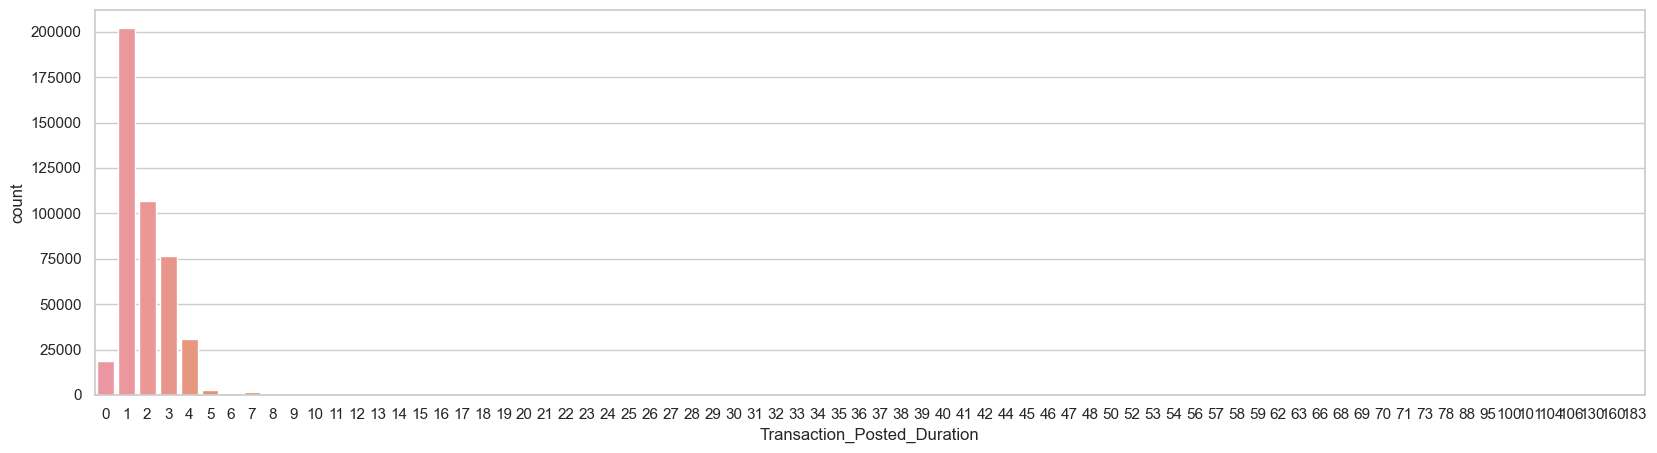

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(20,5))

# Create a countplot using seaborn
g = sns.countplot(x="Transaction_Posted_Duration", data=df1)

# Rotate the x-axis labels for better visibility
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

* Below is a statistical summary of the "Transaction_Posted_Duration" feature. The output shows that there are 442,458 records, with the minimum value being 0 and the maximum value being 183. The mean value is 1.87 and the median is 2.

In [ ]:
df1["Transaction_Posted_Duration"].describe()

count    442458.000000
mean          1.876734
std           1.606127
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         183.000000
Name: Transaction_Posted_Duration, dtype: float64

- Counts the number of records in the df1 dataframe where the Transaction_Posted_Duration is greater than 2:

In [ ]:
anomalies = df1[df1["Transaction_Posted_Duration"] > 2]["Transaction_Posted_Duration"].count()
print(f"Number of potential anomalies: {anomalies}")

Number of potential anomalies: 115319


- Counts the number of records in the df1 dataframe where the Transaction_Posted_Duration is greater than 3

In [ ]:
anomalies = df1[df1["Transaction_Posted_Duration"] > 3]["Transaction_Posted_Duration"].count()
print(f"Number of potential anomalies: {anomalies}")

Number of potential anomalies: 38939


***Logic Behind Feature 1:***

In a typical scenario, the posted date should be close to the transaction date, indicating that the transaction was processed and recorded promptly. However, if the duration between the transaction and the posted date is significantly longer than expected, it may suggest a potential issue.

I display the potential anomalies with threshold of 2 and 3 days separately. To be conservative and to capture a larger portion of potential anomalies, I consider using a threshold of 3 days. This would identify transactions with durations **exceeding the 75th percentile** value. This threshold results in the detection of **38,939** anomalies.

However, to focus on stricter criteria, I also opt for a threshold of 2 days, which is **closer to the median** and captures a relatively significant portion of transactions. This time, the threshold detects **115,319** anomalies.

***Feature 2*** and ***Feature 3***

are similar. Both focus on analyzing the time gaps between purchases to identify transactions that occur too frequently within a short period of time or transactions that have a significant time gap compared to the previous one. Transactions occurring too frequently within a short period of time might indicate suspicious activity, such as multiple fraudulent purchases made in rapid succession. Conversely, transactions with a significant time gap compared to the previous one could suggest irregularities, such as long delays between legitimate transactions or potentially missed transactions.

Feature 2 examines the time difference between consecutive transactions in days, while Feature 3 examines the time difference in minutes. Therefore, the re-structing of the dataset is almost the same, involving the use of different time units with the `.diff()` function.


## Feature 2: Transaction Records with Long Delay

In [ ]:
# Sort the DataFrame by transaction date in ascending order
df.sort_values(by='Transaction_Date', inplace=False)

# Calculate the time difference between consecutive transaction dates in days
df2 = df.assign(Time_Since_Last_Purchase_by_Day=df['Transaction_Date'].diff().dt.days)

# Replace negative values with NaN
df2.loc[df2['Time_Since_Last_Purchase_by_Day'] < 0, 'Time_Since_Last_Purchase_by_Day'] = np.nan

# Drop rows with NaN values in the 'Time_Since_Last_Purchase_by_Day' column
df2.dropna(subset=['Time_Since_Last_Purchase_by_Day'], inplace=True)

# Print the updated DataFrame
df2.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Time_Since_Last_Purchase_by_Day
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,0.0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,1.0


In [ ]:
df2.shape # after dropping those with no re-purchase records

(336125, 16)

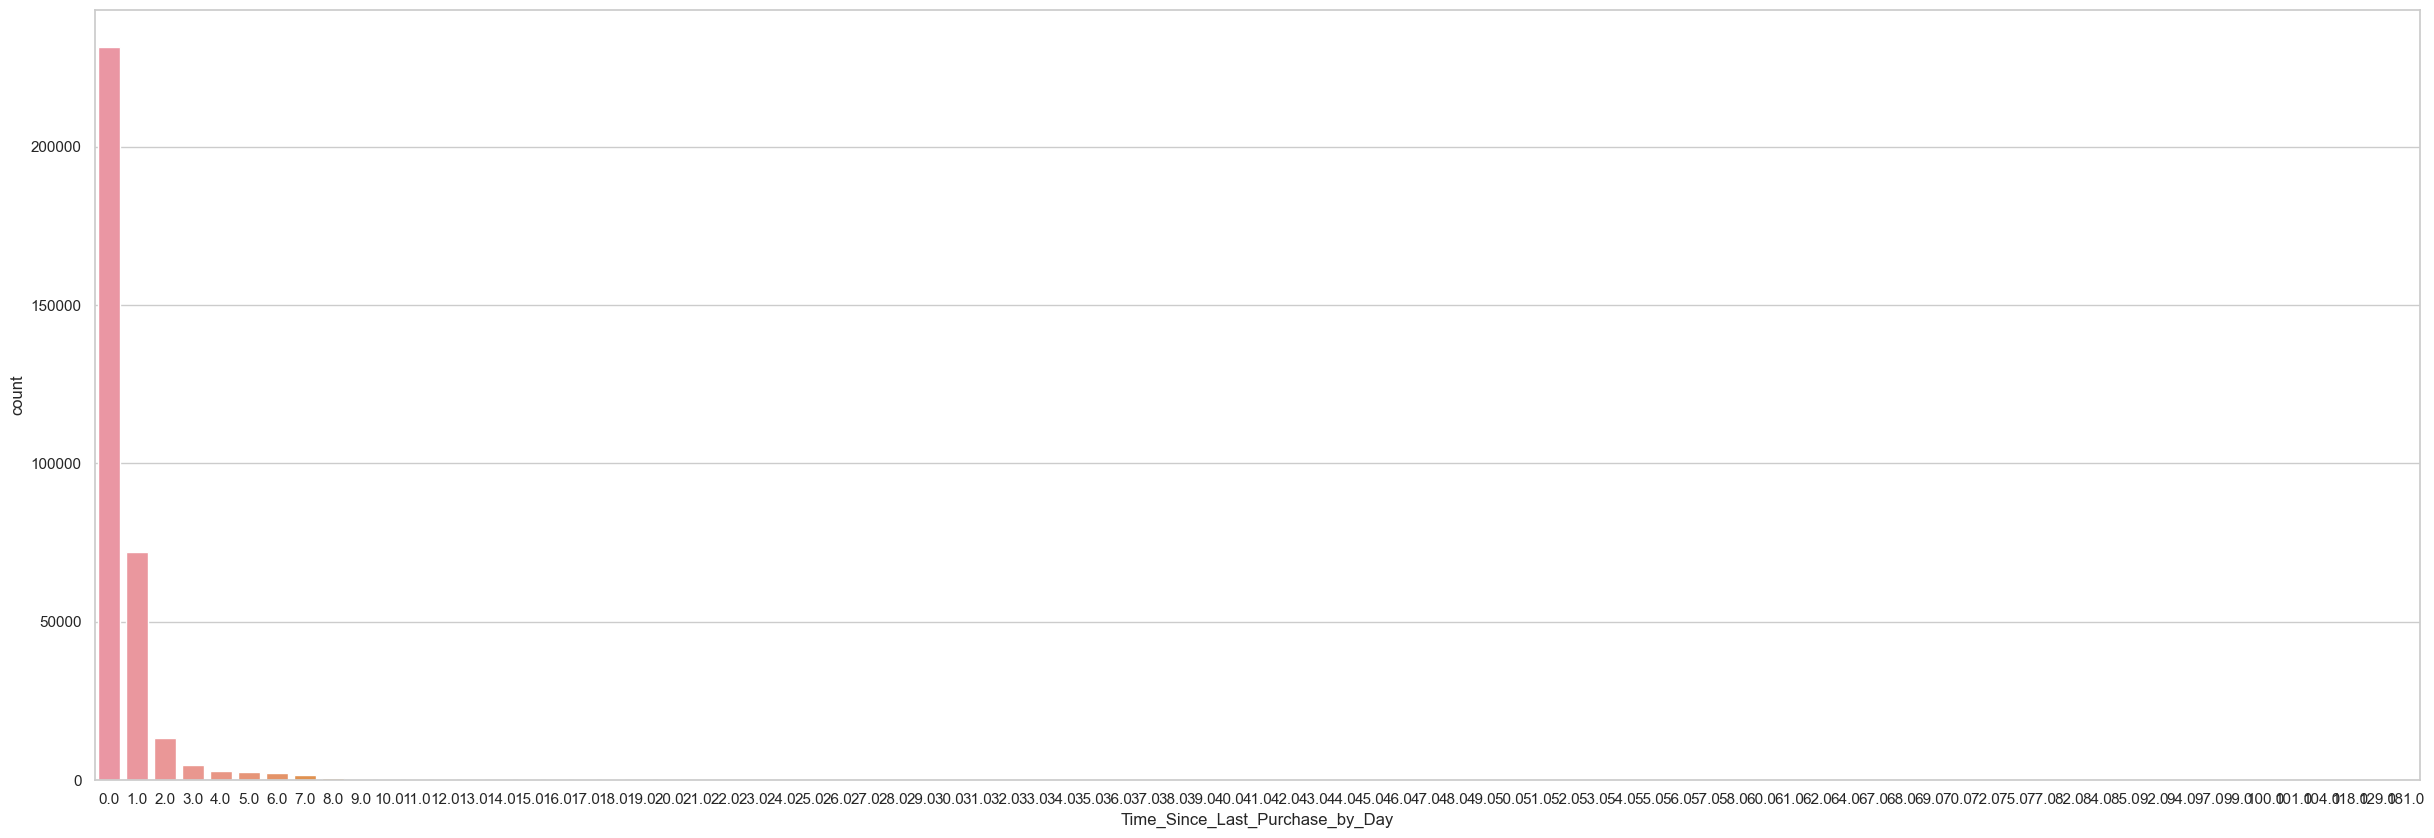

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(30,10))

# Create a countplot using seaborn
g = sns.countplot(x="Time_Since_Last_Purchase_by_Day", data=df2)

# Rotate the x-axis labels for better visibility
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
df2["Time_Since_Last_Purchase_by_Day"].describe()

count    336125.000000
mean          0.758507
std           2.803390
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         181.000000
Name: Time_Since_Last_Purchase_by_Day, dtype: float64

In [ ]:
anomalies = df2[df2["Time_Since_Last_Purchase_by_Day"] > 180]["Time_Since_Last_Purchase_by_Day"].count()
print(f"Number of potential anomalies: {anomalies}")

Number of potential anomalies: 1


***Logic Behind Feature 2:***

A time gap of more than 180 days(say, half a year) between consecutive transactions can be seen as unusual or atypical in many contexts. Normal transaction patterns typically involve more frequent activity, especially for regular customers or ongoing transactions. Such long intervals between transactions may indicate a disruption in the usual pattern and could warrant further investigation.

From detecting anomalies' perspectives, a long time gap between transactions may indicate fraudulent activity. Fraudsters might purposely create a long gap to make it less likely for suspicious patterns to be detected. They may be attempting to evade detection by mimicking a sporadic purchasing behavior or by taking an extended break between fraudulent transactions.

## Feature 3: Transactions Happened in Quick Succession

In [ ]:
# Sort the DataFrame by transaction date in ascending order
df.sort_values(by='Transaction_Date', inplace=False)

# Calculate the time difference between consecutive transaction dates in days
df3 = df.assign(Time_Since_Last_Purchase_by_Min=df['Transaction_Date'].diff().dt.total_seconds() / 60)

# Replace negative values with NaN
df3.loc[df3['Time_Since_Last_Purchase_by_Min'] < 0, 'Time_Since_Last_Purchase_by_Min'] = np.nan

# Drop rows with NaN values in the 'Time_Since_Last_Purchase_by_Min' column
df3.dropna(subset=['Time_Since_Last_Purchase_by_Min'], inplace=True)

# Print the updated DataFrame
df3.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Time_Since_Last_Purchase_by_Min
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,0.0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,1440.0


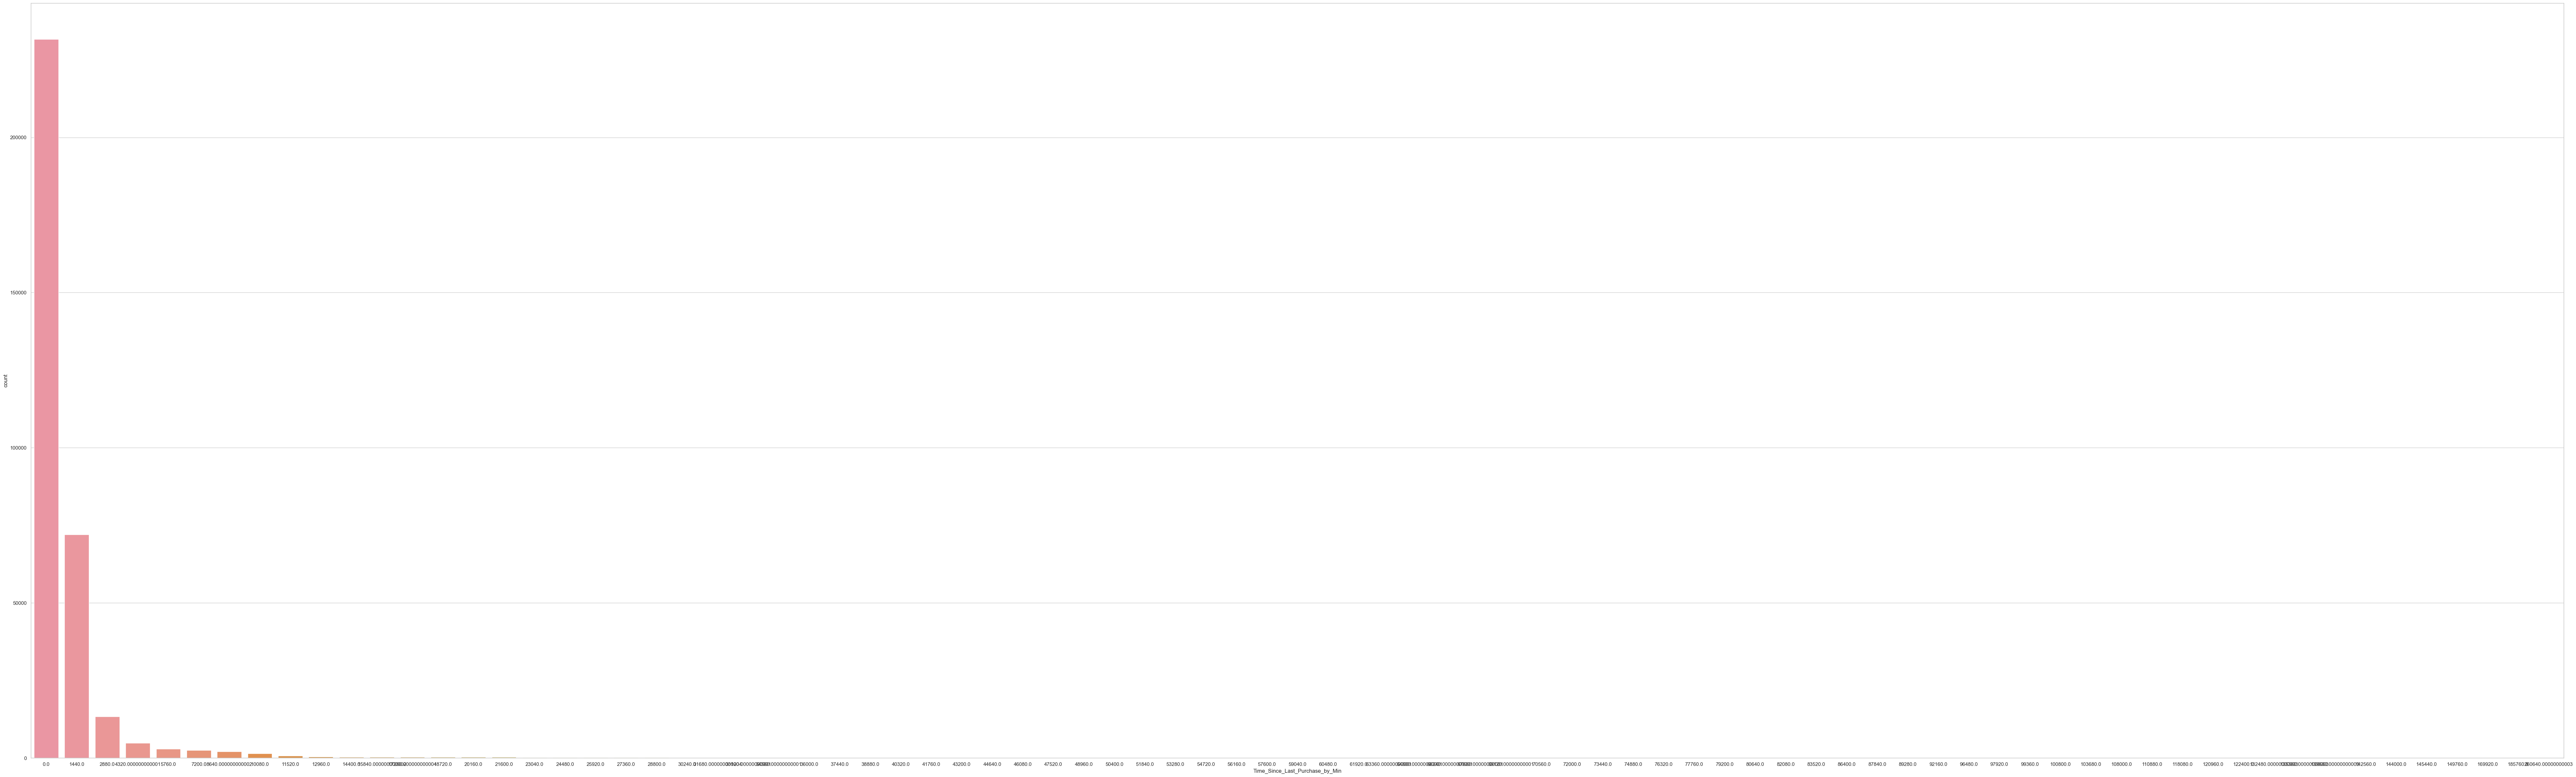

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(100,30))

# Create a countplot using seaborn
g = sns.countplot(x="Time_Since_Last_Purchase_by_Min", data=df3)

# Rotate the x-axis labels for better visibility
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
df3["Time_Since_Last_Purchase_by_Min"].describe()

count    336125.000000
mean       1092.249372
std        4036.881974
min           0.000000
25%           0.000000
50%           0.000000
75%        1440.000000
max      260640.000000
Name: Time_Since_Last_Purchase_by_Min, dtype: float64

In [ ]:
anomalies = df3[df3["Time_Since_Last_Purchase_by_Min"] < 1]["Time_Since_Last_Purchase_by_Min"].count()
print(f"Number of potential anomalies: {anomalies}")

Number of potential anomalies: 231661


***Logic Behind Feature 3:***

I chose 1 min as a threshold based on common knowledge on daily transaction activities. In most cases, transactions that occur within such a short time frame may be considered unusual or atypical. Normal human behavior typically involves some delay between consecutive transactions, even for fast-paced activities. Transactions happening in quick succession may raise suspicions of automated or fraudulent activities, such as bot-driven transactions or attempts to exploit system vulnerabilities. However, I belived that the specific threshold for what is considered an anomaly should be determined based more on domain knowledge, data analysis, and consideration of the specific use case or business requirements.

## Feature 4: Total Mean Anomalies for Transactions with Same Merchant in the Past 30 Days

In [ ]:
# Calculate the total number of transactions with each merchant for each month:
merchant_transactions = df.groupby(['Merchant_Category', 'Month']).size().reset_index(name='Transaction_Count')
merchant_transactions

,Merchant_Category,Month,Transaction_Count
0,,10,1
1,,11,2
2,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",1,6
3,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",2,7
4,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",3,9
...,...,...,...
3667,WYNDHAM HOTELS,9,60
3668,WYNDHAM HOTELS,10,39
3669,WYNDHAM HOTELS,11,56
3670,WYNDHAM HOTELS,12,14


In [ ]:
# Create a rolling window of size 30 days to calculate the cumulative sum of transactions for each merchant:
merchant_transactions['Rolling_Sum'] = merchant_transactions.groupby('Merchant_Category')['Transaction_Count'].rolling(window=30, min_periods=1).sum().reset_index(level=0, drop=True)

#Calculate the mean and standard deviation of the cumulative sum for each merchant:
merchant_stats = merchant_transactions.groupby('Merchant_Category')['Rolling_Sum'].agg(['mean', 'std']).reset_index()
merchant_stats

,Merchant_Category,mean,std
0,,2.000000,1.414214
1,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",54.083333,29.815976
2,ADVANTAGE RENT A CAR,2.000000,NaN
3,ADVERTISING SERVICES,841.333333,459.264498
4,AER LINGUS,3.666667,3.055050
...,...,...,...
430,WOMEN'S ACCESSORY AND SPECIALTY STORES,53.083333,31.477144
431,WOMEN'S READY-TO-WEAR STORES,76.583333,46.776953
432,WRECKING AND SALVAGE YARDS,4.000000,2.549510
433,WYNDHAM HOTELS,136.083333,79.527535


- Compare the mean time of visits for each merchant with their respective upper and lower bounds. Any value that falls outside of these bounds can be considered an anomaly.

In [ ]:
anomaly_threshold = 1  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Mean'] = merchant_stats['mean'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Mean'] = merchant_stats['mean'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Mean_Anomaly'] = (merchant_stats['mean'] > merchant_stats['Upper_Bound_Mean']) | (merchant_stats['mean'] < merchant_stats['Lower_Bound_Mean'])

# Count the number of anomalies
mean_anomaly_count = merchant_stats['Mean_Anomaly'].sum()

print("Number of mean anomalies with anomaly threshold = 1 is", mean_anomaly_count)

Number of mean anomalies with anomaly threshold = 1 is 0


In [ ]:
anomaly_threshold = 2  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Mean'] = merchant_stats['mean'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Mean'] = merchant_stats['mean'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Mean_Anomaly'] = (merchant_stats['mean'] > merchant_stats['Upper_Bound_Mean']) | (merchant_stats['mean'] < merchant_stats['Lower_Bound_Mean'])

# Count the number of anomalies
mean_anomaly_count = merchant_stats['Mean_Anomaly'].sum()

print("Number of mean anomalies with anomaly threshold = 2 is", mean_anomaly_count)

Number of mean anomalies with anomaly threshold = 2 is 0


In [ ]:
anomaly_threshold = 3  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Mean'] = merchant_stats['mean'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Mean'] = merchant_stats['mean'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Mean_Anomaly'] = (merchant_stats['mean'] > merchant_stats['Upper_Bound_Mean']) | (merchant_stats['mean'] < merchant_stats['Lower_Bound_Mean'])

# Count the number of anomalies
mean_anomaly_count = merchant_stats['Mean_Anomaly'].sum()

print("Number of mean anomalies with anomaly threshold = 3 is", mean_anomaly_count)

Number of mean anomalies with anomaly threshold = 3 is 0


- I also filter the data for the specific month. Let's say Decemeber.
- The resulting std is NaN because there is no enough datapoints for just one month.

In [ ]:
month = 12  # Change this to the desired month number
merchant_transactions_month12 = merchant_transactions[merchant_transactions['Month'] == month]

# Create a rolling window of size 30 days to calculate the cumulative sum of transactions for each merchant:
merchant_transactions_month12['Rolling_Sum'] = merchant_transactions_month12.groupby('Merchant_Category')['Transaction_Count'].rolling(window=30, min_periods=1).sum().reset_index(level=0, drop=True)

# Calculate the mean and standard deviation of the cumulative sum for each merchant:
merchant_transactions_month12 = merchant_transactions_month12.groupby('Merchant_Category')['Rolling_Sum'].agg(['mean', 'std']).reset_index()
merchant_transactions_month12

,Merchant_Category,mean,std
0,"ACCOUNTING,AUDITING AND BOOKKEEPING SERVICES",4.0,NaN
1,ADVERTISING SERVICES,92.0,NaN
2,AEROMEXICO,3.0,NaN
3,AGRICULTURAL COOPERATIVES,9.0,NaN
4,AIR CONDITIONING AND REFRIGERATION REPAIR SHOPS,17.0,NaN
...,...,...,...
276,WELDING SERVICES,65.0,NaN
277,WOMEN'S ACCESSORY AND SPECIALTY STORES,2.0,NaN
278,WOMEN'S READY-TO-WEAR STORES,6.0,NaN
279,WYNDHAM HOTELS,14.0,NaN


- With a threshold of 2

In [ ]:
anomaly_threshold = 2  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_transactions_month12['Upper_Bound_Mean'] = merchant_transactions_month12['mean'] + anomaly_threshold * merchant_transactions_month12['std']
merchant_transactions_month12['Lower_Bound_Mean'] = merchant_transactions_month12['mean'] - anomaly_threshold * merchant_transactions_month12['std']

# Identify anomalies based on bounds
merchant_transactions_month12['Mean_Anomaly'] = (merchant_transactions_month12['mean'] > merchant_transactions_month12['Upper_Bound_Mean']) | (merchant_transactions_month12['mean'] < merchant_transactions_month12['Lower_Bound_Mean'])

# Count the number of anomalies
mean_anomaly_count = merchant_transactions_month12['Mean_Anomaly'].sum()

print("Number of mean anomalies with anomaly threshold = 2 is", mean_anomaly_count)

Number of mean anomalies with anomaly threshold = 2 is 0


***Logic Behind Feature 4:***

No matter threshold 1,2,3, there's no anomaly detected. This indicates that all the merchants' mean time of visits are within the expected range and do not deviate significantly from the overall distribution.

## Feature 5: Total Std Anomalies for Transactions with Same Merchant in the Past 30 Days

- Similarly to feature 4, compare the std values of visits for each merchant with their respective upper and lower bounds. Any value that falls outside of these bounds can be considered an anomaly.

In [ ]:
anomaly_threshold = 1  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Std'] = merchant_stats['std'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Std'] = merchant_stats['std'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Std_Anomaly'] = (merchant_stats['std'] > merchant_stats['Upper_Bound_Std']) | (merchant_stats['std'] < merchant_stats['Lower_Bound_Std'])

# Count the number of anomalies
std_anomaly_count = merchant_stats['Std_Anomaly'].sum()

print("Number of standard deviation anomalies for a threshold 1 is", std_anomaly_count)

Number of standard deviation anomalies for a threshold 1 is 0


In [ ]:
anomaly_threshold = 2  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Std'] = merchant_stats['std'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Std'] = merchant_stats['std'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Std_Anomaly'] = (merchant_stats['std'] > merchant_stats['Upper_Bound_Std']) | (merchant_stats['std'] < merchant_stats['Lower_Bound_Std'])

# Count the number of anomalies
std_anomaly_count = merchant_stats['Std_Anomaly'].sum()

print("Number of standard deviation anomalies for a threshold 2 is", std_anomaly_count)

Number of standard deviation anomalies for a threshold 2 is 0


In [ ]:
anomaly_threshold = 3  # Number of standard deviations from the mean to consider as anomalies

# Calculate upper and lower bounds for mean time of visits and standard deviation
merchant_stats['Upper_Bound_Std'] = merchant_stats['std'] + anomaly_threshold * merchant_stats['std']
merchant_stats['Lower_Bound_Std'] = merchant_stats['std'] - anomaly_threshold * merchant_stats['std']

# Identify anomalies based on bounds
merchant_stats['Std_Anomaly'] = (merchant_stats['std'] > merchant_stats['Upper_Bound_Std']) | (merchant_stats['std'] < merchant_stats['Lower_Bound_Std'])

# Count the number of anomalies
std_anomaly_count = merchant_stats['Std_Anomaly'].sum()

print("Number of standard deviation anomalies for a threshold 3 is", std_anomaly_count)

Number of standard deviation anomalies for a threshold 3 is 0


***Logic Behind Feature 5:***

The absence of anomalies in the standard deviation (std) values for all the merchants indicates that their mean time of visits falls within the expected range. This suggests that there are no significant deviations or outliers in the merchants' visit patterns.

This finding is positive as it indicates that the visit patterns of the merchants are consistent and stable, without any unusual or unexpected variations in terms of the timing of visits.

## Feature 6: Overlap between Missing Cardholder's Info and Certain Merchant Category Transactions

- Previously through EDA, we found that there are 1629 records of missing card holders' names. Let's examine these records.

In [ ]:
missing_name.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
159319,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,1600.00,BIG TIME LAND CARE,2013-07-22,2013-07-23,LANDSCAPING AND HORTICULTURAL SERVICES,2013,7,30,Monday
159366,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,3259.29,BURKHART'S OFFICE PLUS,2013-07-23,2013-07-24,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2013,7,30,Tuesday
159367,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,2630.89,WORKSPACE RESOURCE INC,2013-07-23,2013-07-24,SPECIAL TRADE CONTRACTORS--NOT ELSEWHERE CLASS...,2013,7,30,Tuesday
159368,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,29.00,CAROLINA BIOLOGICAL SPLY,2013-07-23,2013-07-24,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Tuesday
159369,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,899.19,BURKHART'S OFFICE PLUS,2013-07-23,2013-07-24,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2013,7,30,Tuesday


In [ ]:
missing_name["Amount"].describe()

count    1.629000e+03
mean     1.096153e+04
std      4.998680e+04
min     -9.000000e+03
25%      3.699000e+02
50%      1.720000e+03
75%      6.653300e+03
max      1.089180e+06
Name: Amount, dtype: float64

- For those transactions without proper recording of cardholder names, the 50% quantile is 1,720 USD. The 75% quantile is 6,653 USD.

In [ ]:
# Group the data by the "Merchant_Category" column and count the occurrences of missing names for each category:
missing_by_category = missing_name.groupby('Merchant_Category').size()
missing_by_category

Merchant_Category
ARCHITECTURAL,ENGINEERING,AND SURVEYING SERVICES     20
AUTOMOTIVE PARTS AND ACCESSORIES STORES              51
AUTOMOTIVE TIRE STORES                                1
BOAT DEALERS                                          9
BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED          137
                                                   ... 
TELECOMMUNICATION EQUIPMENT AND TELEPHONE SALES       8
TELECOMMUNICATION SERVICES                           37
TESTING LABORATORIES (NON-MEDICAL)                   13
UTILITIES - ELECTRIC,GAS,WATER,SANITARY              43
WELDING SERVICES                                     16
Length: 71, dtype: int64

In [ ]:
anomaly_threshold = 50  # Example threshold of 50 missing names
anomaly_categories = missing_by_category[missing_by_category > anomaly_threshold].index
anomaly_categories

Index(['AUTOMOTIVE PARTS AND ACCESSORIES STORES',
       'BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED',
       'CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS',
       'CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CLASSIFIED',
       'COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED',
       'INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED',
       'MISCELLANEOUS AND SPECIALTY RETAIL STORES',
       'STATIONERY,OFFICE AND SCHOOL SUPPLY STORES'],
      dtype='object', name='Merchant_Category')

- Among those transactions without proper cardholder names, there are 8 different merchants repeatedly occured under a 50 threshold. Combine the anomaly merchant categories with the 50% quantile purchase amount, below are the first 5 of anomaly records.

In [ ]:
anomaly_records = missing_name[(missing_name['Merchant_Category'].isin(anomaly_categories)) & (missing_name['Amount']> 1720)]
anomaly_records.head(5)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
159366,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,3259.29,BURKHART'S OFFICE PLUS,2013-07-23,2013-07-24,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2013,7,30,Tuesday
159539,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,1920.00,SCANTRON CORPORATION,2013-07-26,2013-07-29,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2013,7,30,Friday
159542,2013-07-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,39347 EACH,6954.07,EX LIBRIS,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday
159713,2013-08-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,2479.47,BURKHART'S OFFICE PLUS,2013-08-06,2013-08-07,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2013,8,32,Tuesday
159846,2013-08-01,75000,TULSA COMMUNITY COLLEGE,Cardholder,e,GENERAL PURCHASE,4189.39,BURKHART'S OFFICE PLUS,2013-08-20,2013-08-21,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2013,8,34,Tuesday


In [ ]:
anomalies = anomaly_records['Amount'].count()
print(f"Number of potential anomalies: {anomalies}")

Number of potential anomalies: 387


***Logic Behind Feature 6:***

Anomalies can be flagged if missing name records and specific merchant categories have a significant overlap. This is because fraudulent activities often occur more frequently in certain merchants due to factors like lax regulations or easier opportunities. In this case, I set a threshold of 50 because this is a yearly record, due to the nature of the dataset, a smaller threshold might be too strict. One can adjust the anomaly threshold according to the specific requirements into the distribution of missing names across different merchant categories.

### Encoding

The following features7,8,9,10,11 are based on the `Description` column. Since it's a categorical variable, firstly, I performed feature hashing on `Description`, resulting in five general features based on the EDA analysis: 'GENERAL PURCHASE', 'AIR TRAVEL', 'ROOM CHARGES', 'ATT', and 'Others'. These features represent the most common types of purchases observed in the dataset, with the 'Others' category capturing the remaining descriptions. The resulting encoded features have been added to the `df_hash` DataFrame.

Actually, when trying to approach this feature, the first thought was using dummy coding, but then it's nothing more than filtering the dataframe. Also, doing one-hot coding for every desciption is impossible for this dataset as there are 88,749 different descriptions. The resulting hashed features ranged from -18.0 to 8.0, which makes it challenging to apply further dummy coding. In such cases, the algorithm automatically categorizes negative values as 0 and positive values as 1, leading to biased results.

Finally, the logic behind creating these features is based on my personal belief that there exists a relationship between anomalies in transaction amounts and specific purchasing purposes indicated by the description. I hypothesize that fraudulent monetary values can vary depending on the nature of the purchase. It's worth capturing any correlation and variation that can help in detecting fradulent activities.

### Feature Hasher

In [ ]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

descriptions = df['Description']

# Create a FeatureHasher object with the desired number of hash buckets
hasher = FeatureHasher(n_features=5, input_type='string')

# Perform feature hashing on the descriptions
hashed_features = hasher.transform(descriptions)

# Convert the hashed features to a Pandas DataFrame
hashed_features_df = pd.DataFrame(hashed_features.toarray())

# Rename the columns with meaningful words
hashed_features_df.columns = ['GENERAL PURCHASE', 'AIR TRAVEL', 'ROOM CHARGES', 'ATT', 'Others']

# Concatenate the hashed DataFrame with the original DataFrame
df_hash = pd.concat([df, hashed_features_df], axis=1)

# Print the updated DataFrame with the renamed hashed features
df_hash.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,GENERAL PURCHASE,AIR TRAVEL,ROOM CHARGES,ATT,Others
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,-1.0,-3.0,5.0,-1.0,4.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,1.0,-1.0,5.0,-1.0,4.0
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,-1.0,-3.0,5.0,-1.0,4.0
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,-1.0,-3.0,5.0,-1.0,4.0
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,2.0,-8.0,8.0,-1.0,3.0


- Then I test the correlation between the 5 added features to ensure that all of them can be used for feature engineering. Because if there are strong correlations between some of the added features, it might indicate redundancy or multicollinearity.

### Multicollinearity Detection

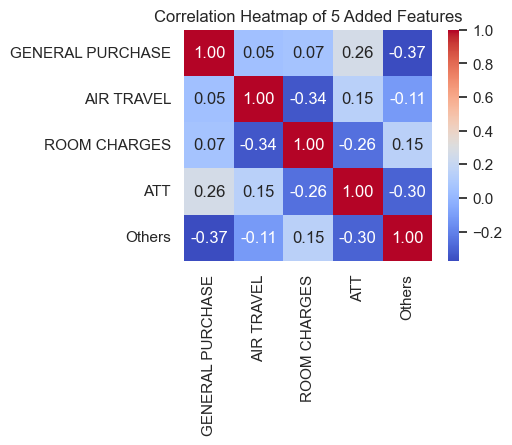

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame to include only the added features
added_features = df_hash[['GENERAL PURCHASE', 'AIR TRAVEL', 'ROOM CHARGES', 'ATT', 'Others']]

# Compute the correlation matrix
correlation_matrix = added_features.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of 5 Added Features')
plt.show()

- There is no multicollinearity among the 5 features, so the following five FE analysis can be guided by them.

## Feature 7: Amount Anomalies with Purchasing Purpose 'GENERAL PURCHASE'

- Keep only the GENERAL PURCHASE feature

In [ ]:
df7 = df_hash.drop(['AIR TRAVEL', 'ROOM CHARGES', 'ATT', 'Others'], axis=1)
df7.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,GENERAL PURCHASE
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,-1.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,1.0


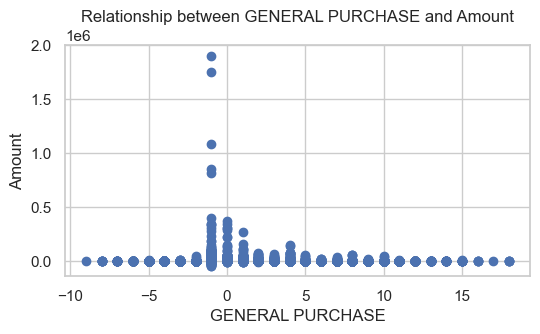

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
general_purchase = df7['GENERAL PURCHASE']
amount = df7['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(general_purchase, amount, cmap='viridis')
plt.xlabel('GENERAL PURCHASE')
plt.ylabel('Amount')
plt.title('Relationship between GENERAL PURCHASE and Amount')
plt.show()

- Visualize the anomalies with a threshold = 10000, and display the anomaly result using print statement.

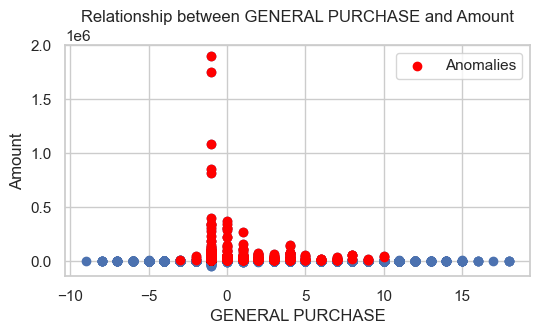

Number of potential anomalies: 822


In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for anomalies
threshold = 10000

# Extract the relevant columns
general_purchase = df7['GENERAL PURCHASE']
amount = df7['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(general_purchase, amount, cmap='viridis')

# Highlight anomalies
anomalies7 = df7[df7['Amount'] > threshold]
plt.scatter(anomalies7['GENERAL PURCHASE'], anomalies7['Amount'], color='red', label='Anomalies')

plt.xlabel('GENERAL PURCHASE')
plt.ylabel('Amount')
plt.title('Relationship between GENERAL PURCHASE and Amount')
plt.legend()
plt.show()

anomalies7 = anomalies7[anomalies7['Description'] == 'GENERAL PURCHASE']["GENERAL PURCHASE"].count()
print(f"Number of potential anomalies: {anomalies7}")

## Feature 8: Amount Anomalies with Purchasing Purpose 'AIR TRAVEL'

In [ ]:
df8 = df_hash.drop(['GENERAL PURCHASE', 'ROOM CHARGES', 'ATT', 'Others'], axis=1)
df8.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AIR TRAVEL
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,-3.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,-1.0


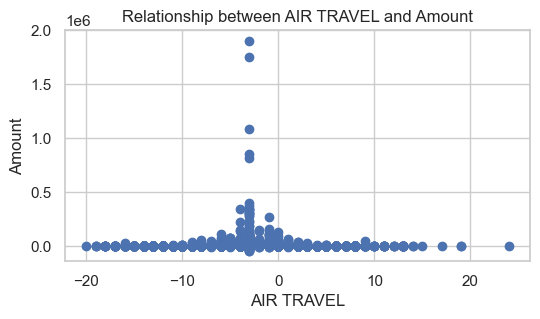

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
air_travel = df8['AIR TRAVEL']
amount = df8['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(air_travel, amount, cmap='viridis')
plt.xlabel('AIR TRAVEL')
plt.ylabel('Amount')
plt.title('Relationship between AIR TRAVEL and Amount')
plt.show()

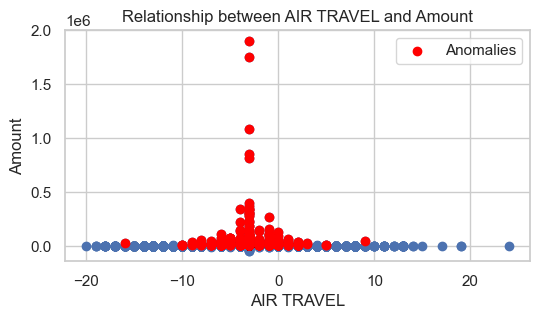

Number of potential anomalies: 14


In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for anomalies
threshold = 10000

# Extract the relevant columns
air_travel = df8['AIR TRAVEL']
amount = df8['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(air_travel, amount, cmap='viridis')

# Highlight anomalies
anomalies8 = df8[df8['Amount'] > threshold]
plt.scatter(anomalies8['AIR TRAVEL'], anomalies8['Amount'], color='red', label='Anomalies')

plt.xlabel('AIR TRAVEL')
plt.ylabel('Amount')
plt.title('Relationship between AIR TRAVEL and Amount')
plt.legend()
plt.show()

anomalies8 = anomalies8[anomalies8['Description'] == 'AIR TRAVEL']["AIR TRAVEL"].count()
print(f"Number of potential anomalies: {anomalies8}")

## Feature 9: Amount Anomalies with Purchasing Purpose 'ROOM CHARGES'

In [ ]:
df9 = df_hash.drop(['GENERAL PURCHASE', 'AIR TRAVEL', 'ATT', 'Others'], axis=1)
df9.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,ROOM CHARGES
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,5.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,5.0


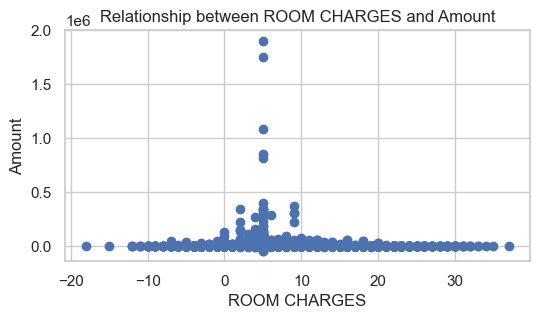

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
room_charges = df9['ROOM CHARGES']
amount = df9['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(room_charges, amount, cmap='viridis')
plt.xlabel('ROOM CHARGES')
plt.ylabel('Amount')
plt.title('Relationship between ROOM CHARGES and Amount')
plt.show()

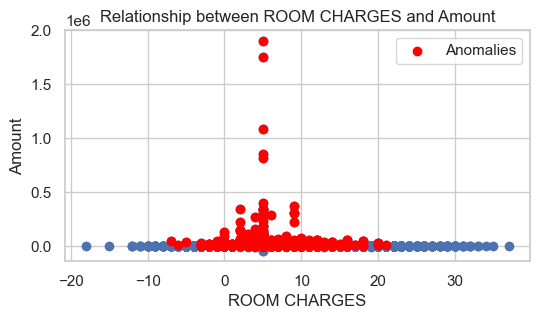

Number of potential anomalies: 79


In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for anomalies
threshold = 5000

# Extract the relevant columns
room_charges = df9['ROOM CHARGES']
amount = df9['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(room_charges, amount, cmap='viridis')

# Highlight anomalies
anomalies9 = df9[df9['Amount'] > threshold]
plt.scatter(anomalies9['ROOM CHARGES'], anomalies9['Amount'], color='red', label='Anomalies')

plt.xlabel('ROOM CHARGES')
plt.ylabel('Amount')
plt.title('Relationship between ROOM CHARGES and Amount')
plt.legend()
plt.show()

anomalies9 = anomalies9[anomalies9['Description'] == 'ROOM CHARGES']["ROOM CHARGES"].count()
print(f"Number of potential anomalies: {anomalies9}")

## Feature 10: Amount Anomalies with Purchasing Purpose 'ATT'

In [ ]:
df10 = df_hash.drop(['GENERAL PURCHASE', 'AIR TRAVEL', 'ROOM CHARGES', 'Others'], axis=1)
df10.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,ATT
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,-1.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,-1.0


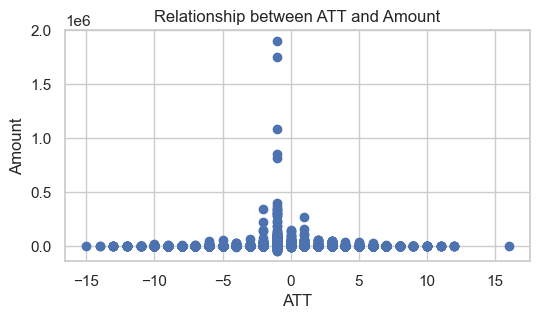

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
att = df10['ATT']
amount = df10['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(att, amount, cmap='viridis')
plt.xlabel('ATT')
plt.ylabel('Amount')
plt.title('Relationship between ATT and Amount')
plt.show()

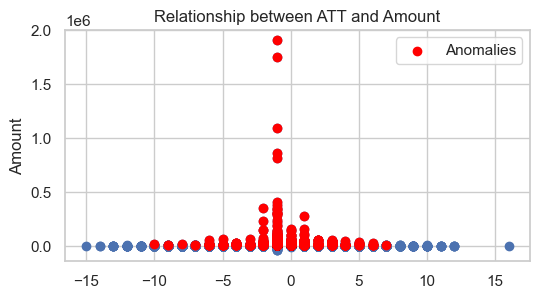

Number of potential anomalies: 3165


In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for anomalies
threshold = 5000

# Extract the relevant columns
att = df10['ATT']
amount = df10['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(att, amount, cmap='viridis')

# Highlight anomalies
anomalies10 = df10[df10['Amount'] > threshold]
plt.scatter(anomalies10['ATT'], anomalies10['Amount'], color='red', label='Anomalies')

plt.xlabel
plt.ylabel('Amount')
plt.title('Relationship between ATT and Amount')
plt.legend()
plt.show()

anomalies10 = df10[df10["Description"].str.contains("AT&T")]["ATT"].count()
print(f"Number of potential anomalies: {anomalies10}")

## Feature 11: Amount Anomalies with Purchasing Purpose 'Others'

In [ ]:
df11 = df_hash.drop(['GENERAL PURCHASE', 'AIR TRAVEL', 'ROOM CHARGES', 'ATT'], axis=1)
df11.head(2)

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Others
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,4.0
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,4.0


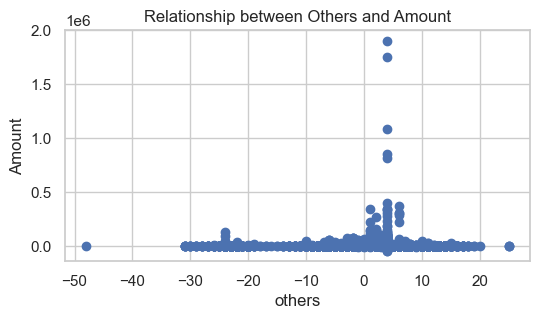

In [ ]:
import matplotlib.pyplot as plt

# Extract the relevant columns
others = df11['Others']
amount = df11['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(others, amount, cmap='viridis')
plt.xlabel('others')
plt.ylabel('Amount')
plt.title('Relationship between Others and Amount')
plt.show()

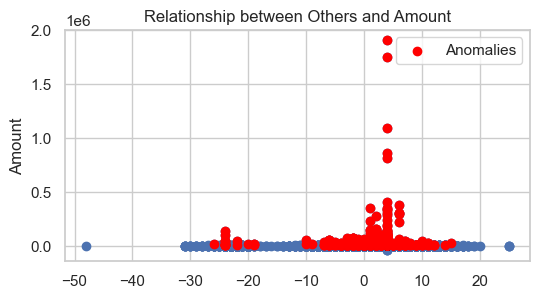

Number of potential anomalies: 2585


In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for anomalies
threshold = 5000

# Extract the relevant columns
others = df11['Others']
amount = df11['Amount']

# Create a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(others, amount, cmap='viridis')

# Highlight anomalies
anomalies11 = df11[df11['Amount'] > threshold]
plt.scatter(anomalies11['Others'], anomalies11['Amount'], color='red', label='Anomalies')

plt.xlabel
plt.ylabel('Amount')
plt.title('Relationship between Others and Amount')
plt.legend()
plt.show()

anomalies11 = anomalies11["Others"].count()
print(f"Number of potential anomalies: {anomalies11}")

## Feature 12: Total Amount Spent On The Same Day Up To This Transaction

- Use `.groupby()` and `.cumsum()` to build the feature

In [ ]:
# Sort the DataFrame by the 'Transaction_Date' column in ascending order
df12 = df.sort_values('Transaction_Date')

# Calculate the cumulative sum of the 'Amount' column within each day
df12['Total_Amount_Spent_On_The_Same_Day'] = df12.groupby('Transaction_Date')['Amount'].cumsum()

df12.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Total_Amount_Spent_On_The_Same_Day
31364,2013-10-01,1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,2013-04-17,2013-10-17,COMBINATION CATALOG AND RETAIL MERCHANT,2013,10,16,Wednesday,-34.82
147048,2013-07-01,63200,SPEECH-LANGUAGE PATHOLOGY & AUDIOLOGY,Hall,A,GENERAL PURCHASE,-7.00,CREDIT PURCHASE BALANCE,2013-04-30,2013-07-01,DISCOUNT STORES,2013,7,18,Tuesday,-7.00
9276,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ropers,A,ROOM CHARGES,15120.00,BETHESDA COURT HOTEL,2013-05-16,2013-07-24,"LODGING--HOTELS,MOTELS,AND RESORTS",2013,7,20,Thursday,15120.00
1901,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Robinson,S,GENERAL PURCHASE,-2.30,HYATT PLACE STOCKYARDS,2013-05-21,2013-07-02,HYATT HOTELS/INT'L,2013,7,21,Tuesday,-2.30
3487,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Baugh,R,GENERAL PURCHASE,-308.00,Claim ADJ/AMERICAS BEST V,2013-05-22,2013-07-09,AMERICAS BEST VALUE INN,2013,7,21,Wednesday,-308.00


- Visualize the distribution

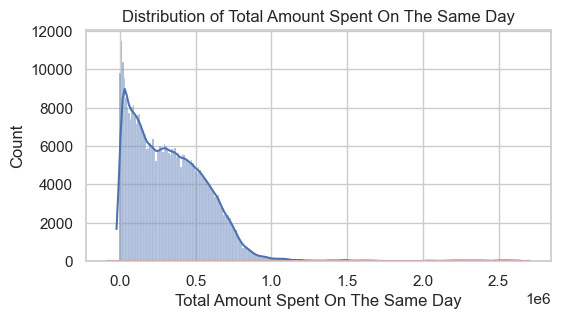

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 3))  # Set the figure size to 6 inches wide and 3 inches tall
sns.histplot(data=df12, x='Total_Amount_Spent_On_The_Same_Day', kde=True)

# Add a curve representing the skewness
sns.kdeplot(data=df12, x='Total_Amount_Spent_On_The_Same_Day', color='red')

plt.xlabel('Total Amount Spent On The Same Day')
plt.ylabel('Count')
plt.title('Distribution of Total Amount Spent On The Same Day')

plt.show()

***Summary:***

- This is a right-skewed distribution
- To detect anomalies in a skewed distribution, consider using statistical methods Z-score and the interquartile range (IQR).

***Z-score***

In [ ]:
from scipy.stats import zscore

# Calculate the Z-scores
z_scores = zscore(df12['Total_Amount_Spent_On_The_Same_Day'])

# Define a threshold for anomaly detection
threshold = 2

# Find the indices of potential anomalies
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

# Get the values of the potential anomalies
anomalies12 = df12['Total_Amount_Spent_On_The_Same_Day'].iloc[anomaly_indices].count()
print(f"Number of potential anomalies with a threshold of 2: {anomalies12}")

Number of potential anomalies with a threshold of 2: 8421


In [ ]:
from scipy.stats import zscore

# Calculate the Z-scores
z_scores = zscore(df12['Total_Amount_Spent_On_The_Same_Day'])

# Define a threshold for anomaly detection
threshold = 3

# Find the indices of potential anomalies
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

# Get the values of the potential anomalies
anomalies12 = df12['Total_Amount_Spent_On_The_Same_Day'].iloc[anomaly_indices].count()
print(f"Number of potential anomalies with a threshold of 3: {anomalies12}")

Number of potential anomalies with a threshold of 3: 3639


***IQR***

In [ ]:
# Calculate the IQR
Q1 = df12['Total_Amount_Spent_On_The_Same_Day'].quantile(0.25)
Q3 = df12['Total_Amount_Spent_On_The_Same_Day'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for anomaly detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the indices of potential anomalies
anomaly_indices = np.where((df12['Total_Amount_Spent_On_The_Same_Day'] < lower_bound) | (df12['Total_Amount_Spent_On_The_Same_Day'] > upper_bound))[0]

# Get the values of the potential anomalies
anomalies12 = df12['Total_Amount_Spent_On_The_Same_Day'].iloc[anomaly_indices].count()
print(f"Number of potential anomalies: {anomalies12}")

Number of potential anomalies: 4548


***Logic Behind Feature 12:***

By considering the total amount spent on the same day, we gain a contextual understanding of an individual's purchasing behavior. Unusual patterns or deviations from the norm in this feature can indicate potentially fraudulent or abnormal activities. For example, sudden and significant spikes or drops in spending may suggest fraudulent activities like unauthorized purchases or money laundering.

The Z-score measures how many standard deviations an observation is away from the mean. The IQR is the range between the 25th and 75th percentiles of the data and data points fall outside the range are considered as anomalies. By considering both the IQR and Z-score, anomalies can be captured by unusually high or low spending amounts compared to the rest of the data.

## Feature 13: Average amount spent per transaction over a month on all transactions

- Calculating the average amount spent per transaction over a month on all transactions

In [ ]:
# Calculate the total amount spent per month
total_amount_per_month = df.groupby('Month')['Amount'].sum()

# Count the number of transactions per month
transaction_count_per_month = df.groupby('Month')['Amount'].count()

# Calculate the average amount spent per transaction over a month
average_amount_per_transaction = total_amount_per_month / transaction_count_per_month

# Print the result
print(average_amount_per_transaction)

Month
1     397.368361
2     389.060863
3     460.854807
4     425.228130
5     405.716869
6     436.586554
7     419.180430
8     455.041425
9     451.768880
10    435.781619
11    380.471545
12    435.988757
Name: Amount, dtype: float64


- Visualize the pattern

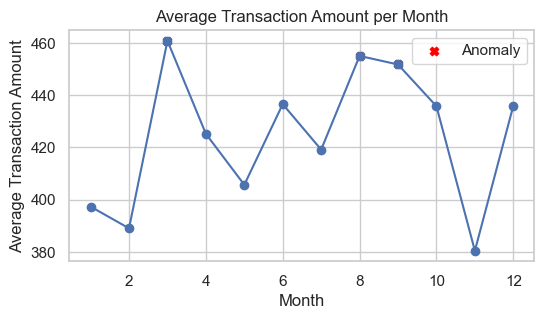

The detected potential anomalies are Month 3, 8, 9


In [ ]:
# Plot the average transaction amount per month
plt.figure(figsize=(6, 3))
plt.plot(average_amount_per_transaction, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount per Month')

# Set the threshold for anomaly detection
threshold = average_amount_per_transaction.quantile(0.75)  # Adjust the quantile value as needed

# Identify anomalies
anomaly_mask = average_amount_per_transaction > threshold
anomaly_months = average_amount_per_transaction[anomaly_mask].index

# Plot anomalies
plt.scatter(anomaly_months, average_amount_per_transaction[anomaly_mask], color='red', marker='X', label='Anomaly')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print the detected anomalies
# Convert month index to a list of month numbers
anomaly_months_str = ', '.join(str(month) for month in anomaly_months)

print(f"The detected potential anomalies are Month {anomaly_months_str}")

- With a threshold 0.9

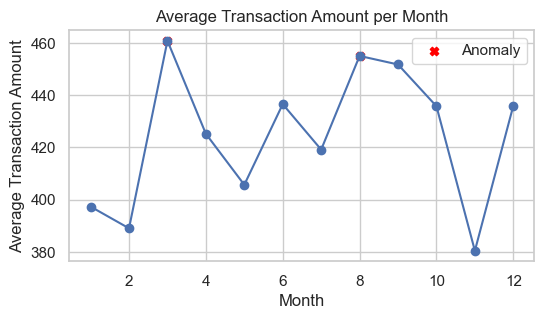

The detected potential anomalies are Month 3, 8


In [ ]:
# Plot the average transaction amount per month
plt.figure(figsize=(6, 3))
plt.plot(average_amount_per_transaction, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount per Month')

# Set the threshold for anomaly detection
threshold = average_amount_per_transaction.quantile(0.9)  # Adjust the quantile value as needed

# Identify anomalies
anomaly_mask = average_amount_per_transaction > threshold
anomaly_months = average_amount_per_transaction[anomaly_mask].index

# Plot anomalies
plt.scatter(anomaly_months, average_amount_per_transaction[anomaly_mask], color='red', marker='X', label='Anomaly')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print the detected anomalies
# Convert month index to a list of month numbers
anomaly_months_str = ', '.join(str(month) for month in anomaly_months)

print(f"The detected potential anomalies are Month {anomaly_months_str}")

***Logic Behind Feature 13:***

The logic behind using this feature for anomaly detection is based on the assumption that anomalies may exhibit significantly different spending patterns compared to the average. By calculating the average transaction amount for each month, we can establish a baseline or expected level of spending. Anomalies can occur when there are transactions with abnormally high or low amounts compared to the average for a particular month. For example, if the average transaction amount in December is relatively low due to seasonal discounts or promotions, a transaction with an exceptionally high amount during that month could be flagged as an anomaly. The threshold represents the value above which data points can be considered potential anomalies. Higher quantiles (e.g., 0.9) will be more lenient in detecting anomalies, while lower quantiles will capture more extreme values as anomalies.

## Feature 14: Relative Amount Spent per Month

- Calculate the relative amount spent per month

In [ ]:
# Calculate the average amount spent per month
average_amount_per_month = df.groupby('Month')['Amount'].mean()

# Calculate the total amount spent per month
total_amount_per_month = df.groupby('Month')['Amount'].sum()

# Calculate the relative amount spent per month
relative_amount_per_month=total_amount_per_month / average_amount_per_month

# Print the result
print(relative_amount_per_month)

Month
1     37230.0
2     35831.0
3     38188.0
4     39249.0
5     36784.0
6     37955.0
7     37635.0
8     39314.0
9     38762.0
10    40266.0
11    34275.0
12    26969.0
Name: Amount, dtype: float64


***Summary:***

- Once having the relative amount spent per month, use various statistical techniques to detect anomalies.

- Here are the outlines of my approaches:
1. Z-score method

2. Interquartile Range (IQR) method

3. Machine learning-based methods: Utilize machine learning outlier detection algorithms (Isolation Forest, Local Outlier Factor), and anomaly detection algorithms (One-Class SVM) to identify anomalies.

***Z-score***

In [ ]:
# Calculate the z-scores for the relative amount values
z_scores = (relative_amount_per_month - np.mean(relative_amount_per_month)) / np.std(relative_amount_per_month)

# Set the threshold for anomaly detection (e.g., z-score > 1)
threshold = 1

months = list(range(1, 13))

# Identify anomalies based on the z-scores
anomaly_indices = np.where(z_scores > threshold)[0]
anomaly_months = [months[i] for i in anomaly_indices]

# Print the detected anomalies
print(f"The detected potential anomaly with a threshold 1 is Month {month}")

The detected potential anomaly with a threshold 1 is Month 12


***IQR***

In [ ]:
import numpy as np

# Calculate the IQR for the relative amount values
Q1 = np.percentile(relative_amount_per_month, 25)
Q3 = np.percentile(relative_amount_per_month, 75)
IQR = Q3 - Q1

# Define the range for majority of the data
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Identify anomalies based on the defined range
anomaly_indices_iqr = np.where((relative_amount_per_month < lower_range) | (relative_amount_per_month > upper_range))[0]
anomaly_months_iqr = [months[i] for i in anomaly_indices_iqr]

# Print the detected anomalies using IQR method
print(f"The detected potential anomaly using IQR method is Month {month}")

The detected potential anomaly using IQR method is Month 12


***Machine Learning-Based Methods***

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Use Isolation Forest algorithm for anomaly detection
isolation_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
isolation_forest.fit(relative_amount_per_month.values.reshape(-1, 1))
anomaly_indices_iforest = np.where(isolation_forest.predict(relative_amount_per_month.values.reshape(-1, 1)) == -1)[0]
anomaly_months_iforest = [months[i] for i in anomaly_indices_iforest]

# Use Local Outlier Factor algorithm for anomaly detection
lof = LocalOutlierFactor(contamination=0.05)  # Adjust the contamination parameter as needed
lof.fit_predict(relative_amount_per_month.values.reshape(-1, 1))
anomaly_indices_lof = np.where(lof.negative_outlier_factor_ < -1.5)[0]
anomaly_months_lof = [months[i] for i in anomaly_indices_lof]

# Use One-Class SVM algorithm for anomaly detection
svm = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
svm.fit(relative_amount_per_month.values.reshape(-1, 1))
anomaly_indices_svm = np.where(svm.predict(relative_amount_per_month.values.reshape(-1, 1)) == -1)[0]
anomaly_months_svm = [months[i] for i in anomaly_indices_svm]



# Print the detected anomalies using machine learning-based methods
print("- The detected potential anomaly using machine learning-based methods (Isolation Forest) is")
for month in anomaly_months_iforest:
    print(f"Month {month}")

print("- The detected potential anomaly using machine learning-based methods (Local Outlier Factor) is")
for month in anomaly_months_lof:
    print(f"Month {month}")

print("- The detected potential anomaly using machine learning-based methods (One-Class SVM) is")
for month in anomaly_months_svm:
    print(f"Month {month}")

- The detected potential anomaly using machine learning-based methods (Isolation Forest) is
Month 12
- The detected potential anomaly using machine learning-based methods (Local Outlier Factor) is
- The detected potential anomaly using machine learning-based methods (One-Class SVM) is
Month 1
Month 11


***Logic Behind Feature 14:***

The "Relative Amount Spent per Month" feature captures the spending behavior of users across different months and provides a relative measure of how much they spend compared to the average monthly spending. The logic behind using this feature for anomaly detection is based on the assumption that anomalies may exhibit distinct spending patterns that differ from the majority of the data. For example, consider a scenario where most users have consistent spending habits throughout the year, with minor fluctuations in their monthly spending. However, if there are instances where a user or a group of users significantly deviates from their typical spending behavior, it could indicate potential anomalies. Values falling outside the range for IQR, and data points obtaining high anomaly scores calculated by ML models are flagged as potential anomalies.

## Feature 15: Average Amount Spent Over 1 Week During the Past 3 Months

In [ ]:
# Calculate the rolling average amount spent over 1 week for the past 3 months
df15 = df.assign(Rolling_Avg_Amount=df['Amount'].rolling(window=7, min_periods=1).mean())
df15.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Rolling_Avg_Amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,890.000000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,629.480000
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2013,7,31,Monday,474.926667
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,380.292500
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2013,7,31,Tuesday,329.426000


- Visualize the pattern

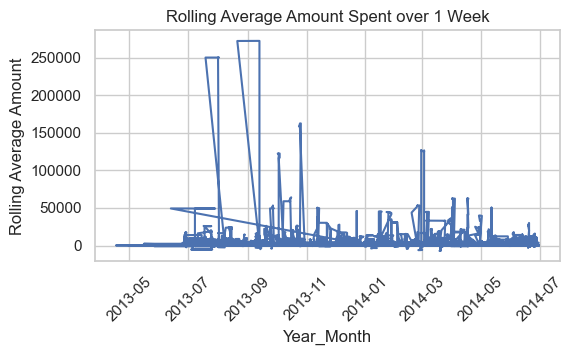

In [ ]:
import matplotlib.pyplot as plt

# Plot the rolling average amount over time
plt.figure(figsize=(6,3))
plt.plot(df15['Transaction_Date'], df15['Rolling_Avg_Amount'])
plt.xlabel('Year_Month')
plt.ylabel('Rolling Average Amount')
plt.title('Rolling Average Amount Spent over 1 Week')
plt.xticks(rotation=45)
plt.show()

- Statistical analysis

In [ ]:
import numpy as np

# Calculate the z-scores for the rolling average amount values
z_scores = (df15['Rolling_Avg_Amount'] - np.mean(df15['Rolling_Avg_Amount'])) / np.std(df15['Rolling_Avg_Amount'])

# Set the threshold for anomaly detection (e.g., z-score > 2)
threshold = 3

# Identify anomalies based on the z-scores
anomaly_indices = np.where(z_scores > threshold)[0]
anomaly15 = len(anomaly_indices)

# Print the detected anomalies
print("Detected potential anomalies:")
for idx in anomaly_indices[:10]:
    print(f"Date: {df15['Transaction_Date'].iloc[idx]}, Rolling Avg Amount: {df15['Rolling_Avg_Amount'].iloc[idx]}")

Detected potential anomalies:
Date: 2013-08-28 00:00:00, Rolling Avg Amount: 9239.808571428555
Date: 2013-08-28 00:00:00, Rolling Avg Amount: 9276.797142857127
Date: 2013-08-29 00:00:00, Rolling Avg Amount: 9371.752857142841
Date: 2013-08-29 00:00:00, Rolling Avg Amount: 9545.832857142841
Date: 2013-08-28 00:00:00, Rolling Avg Amount: 9524.821428571411
Date: 2013-08-29 00:00:00, Rolling Avg Amount: 9558.912857142841
Date: 2013-08-29 00:00:00, Rolling Avg Amount: 9592.911428571413
Date: 2013-08-16 00:00:00, Rolling Avg Amount: 8973.839999999984
Date: 2013-08-15 00:00:00, Rolling Avg Amount: 8973.648571428555
Date: 2013-08-15 00:00:00, Rolling Avg Amount: 8979.592857142841


In [ ]:
print(f"Number of potential anomalies with a threshold of 3 is {anomaly15}")

Number of potential anomalies with a threshold of 3 is 1598


***Logic Behind Feature 15:***

By considering the average amount spent over a specific time period (1 week), we capture short-term patterns and fluctuations in spending behavior. This can help identify anomalies that occur within a condensed timeframe, which may be indicative of fraudulent activities. Calculating the average amount spent over the past 3 months provides a historical reference point. It takes into account the recent spending patterns and establishes a baseline for normal behavior. Any significant deviations from this baseline can be flagged as potential anomalies.